In [200]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.filters as flt
import sys 
sys.path.append('/Users/kaestner/git/scripts/python/')
import amglib.readers as rd
import skimage.io as io
import tifffile as tiff


In [224]:
img= rd.read_image('/Users/kaestner/../Shared/data/02_rawdata_Ducks_Anders/SmallerDuck/90d_00001.fits')
ob = rd.read_image('/Users/kaestner/../Shared/data/02_rawdata_Ducks_Anders/ob_00001.fits')
dc = rd.read_image('/Users/kaestner/../Shared/data/02_rawdata_Ducks_Anders/dc_00001.fits')
img=flt.median(img[1700:600:-1])
ob=flt.median(ob[1700:600:-1])
dc=flt.median(dc[1700:600:-1])
tiff.imwrite('figures/duck/duck90.tif',img)
tiff.imwrite('figures/duck/dc.tif',dc)
tiff.imwrite('figures/duck/ob.tif',ob)



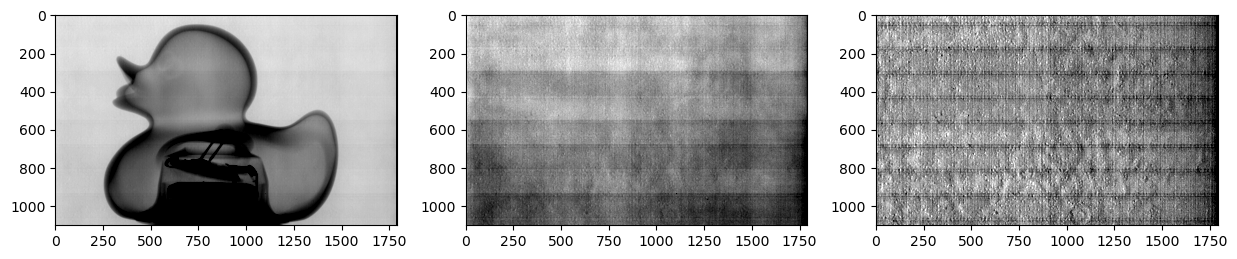

In [215]:
fig,ax=plt.subplots(1,3,figsize=(15,4))
m=img.mean()
s=img.std()
ax[0].imshow(img,clim=[m-s,m+s],cmap='gray')
mo=ob.mean()
so=ob.std()
ax[1].imshow(ob,clim=[mo-so,mo+so],cmap='gray')
md=dc.mean()
sd=dc.std()
ax[2].imshow(dc,clim=[md-sd,md+sd],cmap='gray')

In [219]:
img0=img-dc; img0[img0<1]=1
ob0=ob-dc; ob0[ob0<1]=1
n=img0/ob0

tiff.imwrite('figures/duck/normalized.tif',n)
tiff.imwrite('figures/duck/neglognorm.tif',-np.log(n))

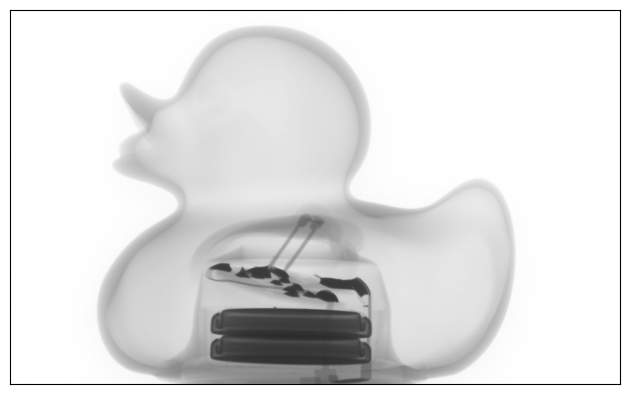

In [218]:
mn,sn=n.mean(),n.std()
plt.imshow(n,clim=[mn-5*sn,1],cmap='gray')
plt.xticks([])
plt.yticks([]);
plt.tight_layout()
plt.savefig('normalized.png')

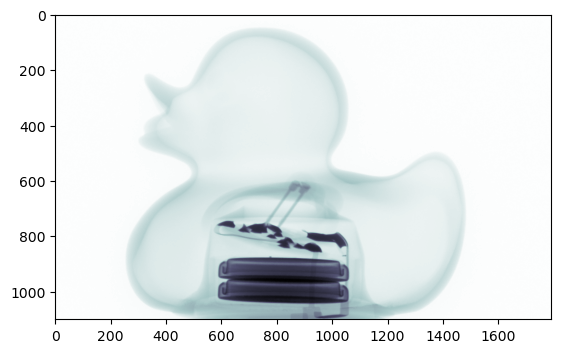

In [223]:
plt.imshow(np.log(n),cmap='bone')

In [208]:
img0.max()

9730.0

In [211]:
def visualize_normalization(img, ob, dc,norm) :
    m, s  = img.mean(), img.std()
    mo,so = ob.mean(), ob.std()
    md,sd = dc.mean(), dc.std()
    mn,sn = n.mean(),n.std()
    
    fig = plt.figure(figsize=(10,4))
    ax1 = plt.subplot2grid(shape=(2, 4), loc=(0, 0))
    ax2 = plt.subplot2grid(shape=(2, 4), loc=(0, 1))
    ax3 = plt.subplot2grid(shape=(2, 4), loc=(1, 0))
    ax4 = plt.subplot2grid(shape=(2, 4), loc=(1, 1))
    ax5 = plt.subplot2grid((2, 4), (0, 2), colspan=2,rowspan=2)

    ax1.imshow(img,clim=[m-s,m+s],cmap='gray')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_title('Measured')

    ax2.imshow(dc,clim=[md-2*sd,md+2*sd],cmap='gray')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_title('Bias')

    ax3.imshow(ob,clim=[mo-2*so,mo+2*so],cmap='gray')
    ax3.set_xticks([])
    ax3.set_yticks([])
    ax3.set_title('Illumination')
    

    ax4.imshow(dc,clim=[md-2*sd,md+2*sd],cmap='gray')
    ax4.set_xticks([])
    ax4.set_yticks([])
    ax4.set_title('Bias')
    

    ax5.imshow(n,clim=[mn-5*sn,1],cmap='gray')
    ax5.set_xticks([])
    ax5.set_yticks([]);
    ax5.set_title('Normalized')
    

    ax1.annotate('-',
                xy=(0.24, 0.63), xycoords='figure fraction',
                horizontalalignment='center', verticalalignment='center',
                fontsize=50)

    ax3.annotate('-',
                xy=(0.24, 0.215), xycoords='figure fraction',
                horizontalalignment='center', verticalalignment='center',
                fontsize=50)

    ax5.annotate('=',
                xy=(0.5, 0.43), xycoords='figure fraction',
                horizontalalignment='center', verticalalignment='center',
                fontsize=30)

    ax1.annotate('', xy=(0.01, 0.43), xycoords='figure fraction', xytext=(0.47,0.43),
    arrowprops=dict(arrowstyle="-",lw=2))
    plt.tight_layout()


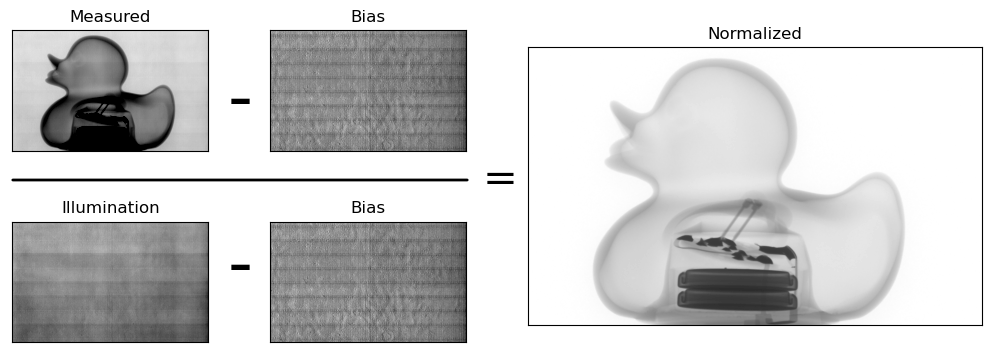

In [212]:
visualize_normalization(img,ob,dc,n)
